In [1]:
import pandas as pd
from alerts import (alert1, alert2, alert3, alert4, alert5,  # type: ignore
                    alert6, alert7, alert8, alert9, alert10)

**1. Генерация данных**

In [2]:
# Подготовка демонстрационных данных (упрощённо):
# Гибридный прогноз по SKU (продукты 101, 102 - старые; 103 - новый; 104 - вне флагов)
hybrid_forecast_df = pd.DataFrame({
    'PRODUCT_LVL_ID5': [101, 102, 103, 104],
    'LOCATION_LVL_ID2': [1, 1, 1, 1],
    'PERIOD_DT': pd.to_datetime(['2022-01-03'] * 4),  # прогноз на неделю 03.01.2022
    'SEGMENT_NAME': ['SEG_A'] * 4,
    'VF_FORECAST_VALUE': [50.0, 5.0, 100.0, 20.0],   # условно, VF и ML берём равными гибридному для простоты
    'DEMAND_TYPE': ['regular'] * 4,
    'ASSORTMENT_TYPE': ['old', 'old', 'new', 'old'],
    'ML_FORECAST_VALUE': [50.0, 5.0, 100.0, 20.0],
    'HYBRID_FORECAST_VALUE': [50.0, 5.0, 100.0, 20.0]
})

In [3]:
# Восстановленный спрос (исторические продажи) для продуктов 101 и 102
restored_demand_df = pd.DataFrame({
    'PRODUCT_LVL_ID5': [101, 101, 102, 102],
    'LOCATION_LVL_ID2': [1, 1, 1, 1],
    'PERIOD_DT': pd.to_datetime(['2021-01-04', '2021-12-13', '2021-01-04', '2021-12-13']),
    'SALESTGT_QTY_R': [20, 10, 20, 50]  # продажи: в начале 2021 года и в конце 2021 года
})

In [4]:
# Флаги прогнозирования (FORECAST_FLAG) с указанием периодов активности прогнозов:
forecast_flag_df = pd.DataFrame({
    'PRODUCT_LVL_ID5': [101, 102, 103, None],        # None для записи уровня категории
    'PRODUCT_LVL_ID4': [None, None, None, 100],      # категория 100 для VF
    'LOCATION_LVL_ID2': [1, 1, 1, 1],
    'PERIOD_START_DT': pd.to_datetime(['2019-01-01', '2020-01-01', '2021-12-15', '2019-01-01']),
    'PERIOD_END_DT': pd.to_datetime(['2022-12-31'] * 4),
    'STATUS': ['active'] * 4
})

In [5]:
# Сегменты VF (для категории 100)
vf_segments_df = pd.DataFrame({
    'PRODUCT_LVL_ID4': [100],
    'LOCATION_LVL_ID2': [1],
    'SEGMENT_NAME': ['LEVEL_MODEL']  # несезонная модель (не содержит "SEASON")
})

In [6]:
# Параметры конфигурации (граничные даты, горизонты и т.д.)
config_params = {
    'IB_HIST_END_DT': '2021-12-31',   # конец исторического периода (31 дек 2021)
    'IB_FC_HORIZ': 52,               # горизонт прогнозирования (например, 52 недель)
    'IB_FF_ACTIVE_STATUS_LIST': ['active'],
    'IB_ALERT_MIN_VAL': 0.1,
    'IB_ALERT_MIN_OBS': 1,
    'IB_MAX_NP_HISTORY': 30,
    'IB_VF_PRODUCT_LVL': 4,
    'IB_VF_LOCATION_LVL': 2
}

In [7]:
# Таблица параметров алертов (ALERT_PARAMETERS), содержащая настройки уровней и порогов для каждого ALERT_ID
alert_parameters_df = pd.DataFrame([
    # alert_id, product_lvl, location_lvl, customer_lvl, distr_channel_lvl, tim_lvl, threshold_val, target_table, target_column, tgt_type 
    (1, 5, 2, None, None, 'week', None, 'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (2, 5, 2, None, None, 'week', 2.0,  'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (3, 5, 2, None, None, 'week', 2.0,  'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (4, 5, 2, None, None, 'week', 5.0,  'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (5, 5, 2, None, None, 'week', 5.0,  'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (6, 5, 2, None, None, 'week', 2.0,  'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (7, 5, 2, None, None, 'week', None, 'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (8, 5, 2, None, None, 'week', 20.0, 'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (9, 5, 2, None, None, 'week', 1.0,  'ACC_AGG_HYBRID_FORECAST_pos', 'HYBRID_FORECAST_VALUE', 'pos'),
    (10,4, 2, None, None, 'week', 2.0,  'ACC_VF_FORECAST',            'FORECAST_VALUE',        '')
], columns=['alert_id','al_product_lvl','al_location_lvl','al_customer_lvl','al_distr_channel_lvl',
            'al_tim_lvl','alert_threshold_val','Input_table_table','Input_column','tgt_type'])

**2. Запуск алертов**

In [8]:
# Вызов функций алертов и вывод результатов
result1 = alert1(hybrid_forecast_df, forecast_flag_df, alert_parameters_df, config_params)
result2 = alert2(hybrid_forecast_df, restored_demand_df, alert_parameters_df, config_params)
result3 = alert3(hybrid_forecast_df, restored_demand_df, alert_parameters_df, config_params)
result4 = alert4(hybrid_forecast_df, restored_demand_df, alert_parameters_df, config_params)
result5 = alert5(hybrid_forecast_df, restored_demand_df, alert_parameters_df, config_params)
result6 = alert6(hybrid_forecast_df, restored_demand_df, forecast_flag_df, alert_parameters_df, config_params)
result7 = alert7(hybrid_forecast_df, forecast_flag_df, alert_parameters_df, config_params)
result8 = alert8(hybrid_forecast_df, restored_demand_df, forecast_flag_df, hybrid_forecast_df[['PRODUCT_LVL_ID5','PRODUCT_LVL_ID5']].rename(columns={'PRODUCT_LVL_ID5':'PRODUCT_LVL_ID5','PRODUCT_LVL_ID5':'PRODUCT_LVL_ID4'}), 
                 alert_parameters_df, config_params)  # здесь вместо реального product_df используем упрощённо данные product_lvl (для демо)
result9 = alert9(hybrid_forecast_df, forecast_flag_df, alert_parameters_df, config_params)

# Для alert10 подготовим DataFrame VF-прогноза (на уровне категории 100) и вызовем функцию
vf_forecast_df = pd.DataFrame({ 'PRODUCT_LVL_ID4': [100], 'LOCATION_LVL_ID2': [1], 'FORECAST_VALUE': [1000.0] })
result10 = alert10(vf_forecast_df, vf_segments_df, forecast_flag_df, alert_parameters_df, config_params)


**3. Отображение результатов**

In [9]:
# Выведем непустые результаты каждого алерта:
for i, result in enumerate([result1, result2, result3, result4, result5, result6, result7, result8, result9, result10], start=1):
    if not result.empty:
        print(f"Alert {i} ({result['ALERT_TYPE'].iloc[0]}):")
        display(result[['ALERT_TYPE','PRODUCT_ID','STORE_LOCATION_ID','PERIOD_START_DT','KPI_NM','STAT_NOM','STAT_DEN','ALERT_STAT_VAL']])

Alert 1 (NAREG):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
0,NAREG,101.0,1,2021-12-27,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
1,NAREG,101.0,1,2022-01-10,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
2,NAREG,101.0,1,2022-01-17,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
3,NAREG,101.0,1,2022-01-24,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
4,NAREG,101.0,1,2022-01-31,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
...,...,...,...,...,...,...,...,...
152,NAREG,103.0,1,2022-11-28,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
153,NAREG,103.0,1,2022-12-05,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
154,NAREG,103.0,1,2022-12-12,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN
155,NAREG,103.0,1,2022-12-19,pos.HYBRID_FORECAST_VALUE,NaN,1,NaN


Alert 2 (INCRREG):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
0,INCRREG,101,1,2022-01-03,pos.HYBRID_FORECAST_VALUE,50.0,20.0,2.5


Alert 3 (DECRREG):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
0,DECRREG,102,1,2022-01-03,pos.HYBRID_FORECAST_VALUE,5.0,20.0,0.25


Alert 5 (LOWREG):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
1,LOWREG,102,1,2022-01-03,HYBRID_FORECAST_VALUE,5.0,50.0,0.1


Alert 6 (DEVWK):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
0,DEVWK,101,1,2022-01-03,HYBRID_FORECAST_VALUE,40.0,10.0,4.0


Alert 7 (ZEROFLG):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
2,ZEROFLG,104,1,2022-01-03,pos.HYBRID_FORECAST_VALUE,20.0,1,20.0


Alert 10 (NONSEAS):


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
0,NONSEAS,100,1,<NA>,FORECAST_VALUE,<NA>,1,<NA>


In [10]:
# Объединяем все алерты в одну таблицу OutAlerts
OutAlerts = pd.concat([result1, result2, result3, result4, result5, result6, result7, result8, result9, result10], ignore_index=True)
display(OutAlerts[['ALERT_TYPE','PRODUCT_ID','STORE_LOCATION_ID','PERIOD_START_DT','KPI_NM','STAT_NOM','STAT_DEN','ALERT_STAT_VAL']])


C:\Users\rbula\AppData\Local\Temp\ipykernel_14400\2231185339.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  OutAlerts = pd.concat([result1, result2, result3, result4, result5, result6, result7, result8, result9, result10], ignore_index=True)


,ALERT_TYPE,PRODUCT_ID,STORE_LOCATION_ID,PERIOD_START_DT,KPI_NM,STAT_NOM,STAT_DEN,ALERT_STAT_VAL
0,NAREG,101.0,1,2021-12-27,pos.HYBRID_FORECAST_VALUE,NaN,1.0,NaN
1,NAREG,101.0,1,2022-01-10,pos.HYBRID_FORECAST_VALUE,NaN,1.0,NaN
2,NAREG,101.0,1,2022-01-17,pos.HYBRID_FORECAST_VALUE,NaN,1.0,NaN
3,NAREG,101.0,1,2022-01-24,pos.HYBRID_FORECAST_VALUE,NaN,1.0,NaN
4,NAREG,101.0,1,2022-01-31,pos.HYBRID_FORECAST_VALUE,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
158,DECRREG,102.0,1,2022-01-03,pos.HYBRID_FORECAST_VALUE,5.0,20.0,0.25
159,LOWREG,102.0,1,2022-01-03,HYBRID_FORECAST_VALUE,5.0,50.0,0.10
160,DEVWK,101.0,1,2022-01-03,HYBRID_FORECAST_VALUE,40.0,10.0,4.00
161,ZEROFLG,104.0,1,2022-01-03,pos.HYBRID_FORECAST_VALUE,20.0,1.0,20.00


**4. Визуализация статистики алертов**

In [11]:
import matplotlib.pyplot as plt

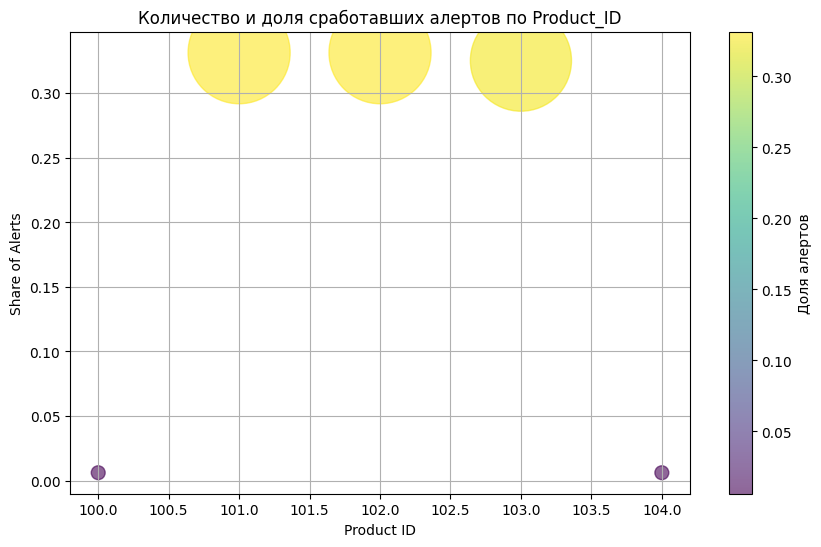

In [12]:
# Группируем по продукту, считаем количество алертов
summary = OutAlerts.groupby('PRODUCT_ID').size().reset_index(name='count')
# Доля алертов от общего количества
summary['share'] = summary['count'] / summary['count'].sum()

# Создаём bubble plot: размер — количество алертов, цвет — доля
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    summary['PRODUCT_ID'],
    summary['share'],
    s=summary['count'] * 100,  # масштабируем размер точек
    c=summary['share'],        # цвет по доле
    alpha=0.6
)
plt.xlabel('Product ID')
plt.ylabel('Share of Alerts')
plt.title('Количество и доля сработавших алертов по Product_ID')
cbar = plt.colorbar(scatter)
cbar.set_label('Доля алертов')
plt.grid(True)
plt.show()